In [12]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [13]:
df = pd.read_csv(r'HousingData.csv')
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [14]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [15]:
df = df.fillna(df.mean())

In [16]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [17]:
X=df.iloc[:,df.columns!='MEDV']
y=df.iloc[:,df.columns=='MEDV']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [18]:
model = Sequential()

model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05, verbose = 1)

Epoch 1/100
12/12 [==============================] - 1s 25ms/step - loss: 3115.7278 - val_loss: 1303.2367
Epoch 2/100
12/12 [==============================] - 0s 9ms/step - loss: 523.8958 - val_loss: 490.2068
Epoch 3/100
12/12 [==============================] - 0s 9ms/step - loss: 248.1408 - val_loss: 218.7457
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 125.2644 - val_loss: 131.3277
Epoch 5/100
12/12 [==============================] - 0s 9ms/step - loss: 90.9242 - val_loss: 114.7331
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 75.4435 - val_loss: 104.2661
Epoch 7/100
12/12 [==============================] - 0s 9ms/step - loss: 70.5981 - val_loss: 105.0952
Epoch 8/100
12/12 [==============================] - 0s 7ms/step - loss: 67.5340 - val_loss: 103.2333
Epoch 9/100
12/12 [==============================] - 0s 7ms/step - loss: 64.8037 - val_loss: 102.2034
Epoch 10/100
12/12 [==============================] - 0s 6ms/step - loss: 6

12/12 [==============================] - 0s 8ms/step - loss: 27.0311 - val_loss: 75.0891
Epoch 82/100
12/12 [==============================] - 0s 6ms/step - loss: 26.9926 - val_loss: 73.2372
Epoch 83/100
12/12 [==============================] - 0s 6ms/step - loss: 27.0277 - val_loss: 87.4025
Epoch 84/100
12/12 [==============================] - 0s 7ms/step - loss: 28.3312 - val_loss: 88.7504
Epoch 85/100
12/12 [==============================] - 0s 11ms/step - loss: 27.7018 - val_loss: 72.1224
Epoch 86/100
12/12 [==============================] - 0s 7ms/step - loss: 25.9979 - val_loss: 75.3438
Epoch 87/100
12/12 [==============================] - 0s 5ms/step - loss: 25.7181 - val_loss: 80.0217
Epoch 88/100
12/12 [==============================] - 0s 6ms/step - loss: 25.4689 - val_loss: 69.6886
Epoch 89/100
12/12 [==============================] - 0s 7ms/step - loss: 26.5518 - val_loss: 68.4069
Epoch 90/100
12/12 [==============================] - 0s 6ms/step - loss: 32.6655 - val_loss: 

In [20]:
mse = model.evaluate(X_test, y_test)
print('Mean squared error on test data: ', mse)

4/4 [==============================] - 0s 4ms/step - loss: 33.6996
Mean squared error on test data:  33.69963836669922


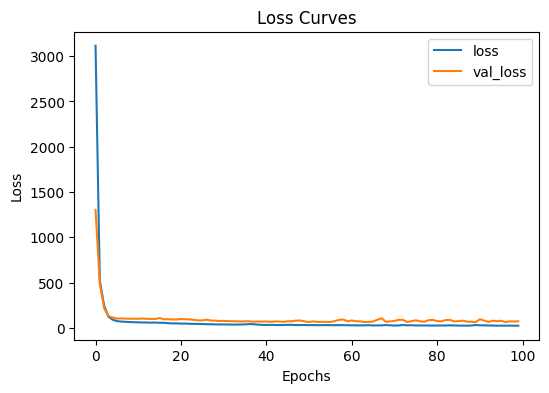

In [21]:
# Plot the loss curves
pd.DataFrame(history.history).plot(figsize=(6, 4), xlabel="Epochs", ylabel="Loss", title='Loss Curves')
plt.show()

In [22]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 0s/step


In [23]:
mse = mean_squared_error(y_test, y_pred)**(0.5)
mse

5.805139638863055

In [24]:
new_inputs = np.array([[0.006, 18, 2.3,0,0.53,6.5,65.2,4.0,1,296,15,396.9,4.98]])
inp = np.array([[0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14]])
predictions = model.predict(inp)
print("Actual predicted values:", predictions)


1/1 [==============================] - 0s 106ms/step
Actual predicted values: [[26.159876]]
